### Testing Data Generator

- This is to generate the data generator that generates artificial data needed to test the model.
- Basic idea is:
    - Have three kinds of latent processes handy:
        - Cyclic > Cosine Kernel
        - Random > Gaussian Kernel
        - Linear Trend > Linear kernels mixed with brownean or ExpQuads to make them nice
     - Generate Data such that 40% of it has linear trend with label 1.
     - Classify and see if we can find the ones with trend
- Note: It's slightly harder task if we d not restrict trends to only increasing or decreaing since we are classifying based on just trend not by increasing or decreasing.

In [4]:
## Linear increasing kernel
from matplotlib import pyplot as plt
from DataGenerator import DataGenerator
%matplotlib inline


In [7]:
import numpy as np
N = 100
S=50
C=5
P=2
phi = np.random.normal(loc=0,scale=1,size=(C,P))
dtgen = DataGenerator()
Y,L,uBar = dtgen.generateData(phi,S=S,C=C,N=N)

50 5 2 100


### PLotting scaled Data

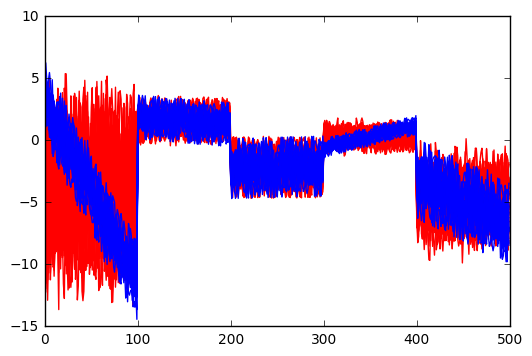

In [8]:
def plotLabel(YBar,L,S):
    for s in range(S):
        if L[s] < 0:
            plt.plot(YBar[s].T,c='r')
    for s in range(S):
        if L[s] > 0:
            plt.plot(YBar[s].T,c='b')
Y=5*Y
plotLabel(Y,L,S)

### A trial run of model on artificial data

In [9]:
import LCMGP
from sklearn.cross_validation import train_test_split
from sklearn import metrics
Y_train, Y_test, L_train, L_test = train_test_split(Y, L, test_size=0.4, random_state=0)
# fit the model
#ind=1
lcgm = LCMGP.LCMGP()
lcgm.fit(Y=Y_train,L=L_train,N=N,induction=0.9,iterations=150)
# predict for test
predictions,Expresults, _ = lcgm.predict(Y_test)


 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


Model initialized with  0.9 induction ratio
150 updates


In [10]:
lcgm.fit(Y=Y_train,L=L_train,N=N,induction=0.9,iterations=150)
predictions,Expresults, _ = lcgm.predict(Y_test)

Model initialized with  0.9 induction ratio
150 updates


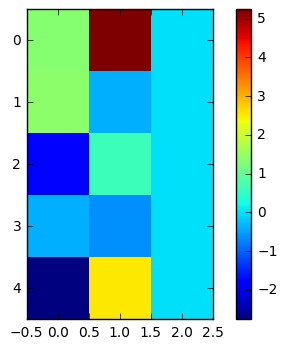

In [11]:
plt.imshow(lcgm.phiHatExp,interpolation='none')
plt.colorbar()

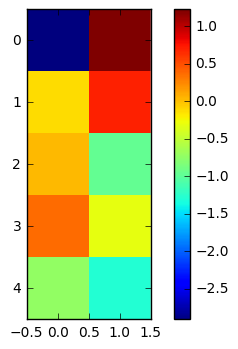

In [12]:
plt.imshow(phi,interpolation='none')
plt.colorbar()

### Checking the training projections

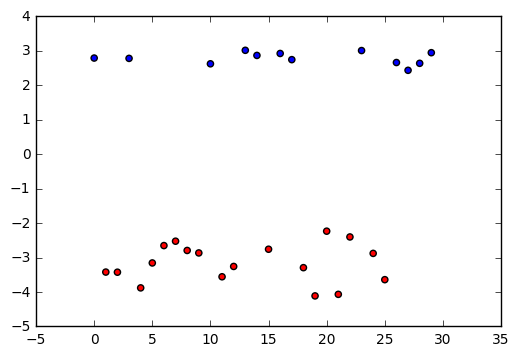

In [13]:
def getColor(L):
    if L  > 0:
        return 'b'
    else:
        return 'r'
    
plt.scatter(range(lcgm.lHatExp.shape[0]),lcgm.lHatExp,c=[getColor(l) for l in L_train])

## Checking separation for test data

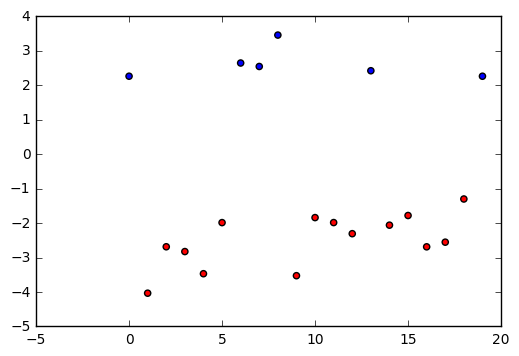

In [14]:
plt.scatter(range(Expresults.shape[0]),Expresults,c=[getColor(l) for l in L_test])

### Store data

In [85]:
import pickle
f = open("Y_linear_gaussian.pickle","wb")
pickle.dump(Y,f)
f.close()
f = open("L_linear_gaussian.pickle","wb")
pickle.dump(L,f)
f.close()
